# NBA Player Career Longevity Prediction: Using Naive Bayes Classifier

## Introduction

The National Basketball Association (NBA), a premier professional basketball league in North America, has brought me on board as a data analytics professional to support league managers and coaching staff in building long-term, successful teams. My role is to analyze player performance data and develop insights that can help identify which athletes are most likely to thrive in the competitive, high-pressure environment of professional basketball.

I will apply the full range of data analytics skills I’ve developed, including data preparation, feature engineering, exploratory data analysis (EDA), and predictive modeling. Using Python, I will build and evaluate a Naive Bayes classification model to predict whether a player will remain in the NBA for at least five years. My ultimate objective is to select key predictive features, assess model performance, and provide actionable insights that can help NBA leadership make more informed decisions about player development and retention strategies.

## Overview

## **Dataset Structure**

This dataset, titled **NBA_player_data.csv**, contains information on **1,340 NBA players**, capturing their **rookie season performance metrics** and career outcomes. Each row represents a unique player and records whether their **NBA career lasted five or more years** through the `target_5yrs` variable. The dataset includes **game participation statistics**, such as `gp` (games played) and `min` (average minutes per game), alongside **performance indicators** like `pts` (points per game) and `reb` (rebounds per game). It also records **shooting efficiencies**, including field goal, three-point, and free throw percentages, as well as measures of **game impact**, such as assists, steals, blocks, and turnovers.

| Column Name   | Type    | Description                                                             |
|:--------------|:---------|:------------------------------------------------------------------------|
| `name`        | object  | Name of NBA player                                                     |
| `gp`          | int64   | Number of games played                                                 |
| `min`         | float64 | Number of minutes played per game                                       |
| `pts`         | float64 | Average number of points per game                                       |
| `fgm`         | float64 | Average number of field goals made per game                              |
| `fga`         | float64 | Average number of field goal attempts per game                           |
| `fg`          | float64 | Average percent of field goals made per game                             |
| `3p_made`     | float64 | Average number of three-point field goals made per game                  |
| `3pa`         | float64 | Average number of three-point field goal attempts per game               |
| `3p`          | float64 | Average percent of three-point field goals made per game                 |
| `ftm`         | float64 | Average number of free throws made per game                              |
| `fta`         | float64 | Average number of free throw attempts per game                           |
| `ft`          | float64 | Average percent of free throws made per game                             |
| `oreb`        | float64 | Average number of offensive rebounds per game                            |
| `dreb`        | float64 | Average number of defensive rebounds per game                            |
| `reb`         | float64 | Average number of rebounds per game                                      |
| `ast`         | float64 | Average number of assists per game                                       |
| `stl`         | float64 | Average number of steals per game                                        |
| `blk`         | float64 | Average number of blocks per game                                        |
| `tov`         | float64 | Average number of turnovers per game                                     |
| `target_5yrs` | int64   | 1 if career duration ≥ 5 years, 0 otherwise                              |

This dataset offers a detailed snapshot of rookie-season player performance, forming the foundation for feature engineering and predictive modeling in the NBA career longevity prediction project.

### **Importing Required Libraries**

Before beginning the analysis, I import the essential Python libraries that support data manipulation, machine learning model development, and performance evaluation. These libraries provide the core functionality for handling structured data, building classification models, and assessing their effectiveness.

### **Library & Package Versions**

To ensure **reproducibility, stability, and compatibility**, I maintain consistent library versions throughout the project. The following versions were used in this analysis:

* **Pandas:** 2.2.3
* **Scikit-learn:** 1.6.1
* **Pickle:** 4.0
* **Matplotlib:** 3.10.1

Using fixed package versions ensures that results remain consistent across different environments and over time.

### **Imports and Setup**

**Core Data Handling**

* `pandas` for reading, cleaning, and manipulating tabular data using DataFrames.

**Machine Learning and Evaluation**

* `sklearn.naive_bayes` for implementing the Naive Bayes classification algorithm.
* `sklearn.model_selection` for:

  * Splitting the dataset into training and testing sets.
  * Performing cross-validation to assess model generalizability.
* `sklearn.metrics` tools for:

  * Calculating and visualizing performance metrics such as accuracy, precision, recall, and the confusion matrix.
  * Summarizing model performance with comprehensive reports.

**Data Visualization**

* `matplotlib.pyplot` for creating visualizations such as confusion matrices and performance curves to better understand model behavior and results.

**Pickle**

* `pickle` for serializing (saving) and deserializing (loading) objects, including the trained Naive Bayes model.

These libraries collectively form the foundation for developing, training, and evaluating the NBA player career longevity prediction model.

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import naive_bayes
from sklearn import model_selection
from sklearn import metrics
import pickle

# Performing initial data exploration and feature engineering 

### Introduction

In this section of the project, I performed **initial data exploration and feature engineering** on a dataset containing performance records of NBA players. The goal was to assess the structure and quality of the data, identify key patterns, and engineer meaningful features that could improve the accuracy of predicting whether a player's NBA career would last **at least five years**. The insights gathered from this process will inform the next phase, where a predictive model will be developed and evaluated.

### Overview

In this Analyze stage, I demonstrate my ability to conduct a thorough data exploration, analysis, and feature engineering process within a structured analytics workflow. This phase lays a solid foundation for predictive modeling by identifying key variables, assessing class balance, addressing data quality issues, and creating impactful new features to enhance predictive power. I document my approach, decision rationale, and insights in alignment with the project objectives and research question to ensure clarity, reproducibility, interpretability, and transparency, preparing the dataset for efficient use in the upcoming modeling phase.

### Import packages

I will start by importing the required Python library:

* **pandas** for data manipulation and analysis

**Versions:**

* **Pandas:** 2.2.3

## Data Loading and Exploration

I will load the dataset and display a sample of the data.

In [38]:
nba_df=pd.read_csv(r"C:\Users\saswa\Documents\GitHub\NBA-Player-Career-Longevity-Prediction-Using-Naive-Bayes-Classifier\Data\nba-players.csv",index_col=0)

In [39]:
nba_df.sample()

,name,gp,min,pts,fgm,fga,fg,3p_made,3pa,3p,...,fta,ft,oreb,dreb,reb,ast,stl,blk,tov,target_5yrs
353,Vern Fleming,80,31.1,14.1,5.4,11.5,47.0,0.0,0.1,0.0,...,4.2,76.7,1.9,2.2,4.0,3.1,1.2,0.1,2.5,1


Then, I will display the first 10 rows of the data to get a sense of what it entails.

In [40]:
nba_df.head()

,name,gp,min,pts,fgm,fga,fg,3p_made,3pa,3p,...,fta,ft,oreb,dreb,reb,ast,stl,blk,tov,target_5yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1


I will display the number of rows and the number of columns to get a sense of how much data is available to me.

In [41]:
print(f"Number of rows: {nba_df.shape[0]}")
print(f"Number of columns: {nba_df.shape[1]}")

Number of rows: 1340
Number of columns: 21


#### **Dataset Overview: Number of Rows and Columns**

The dataset consists of 1,340 rows and 21 columns, indicating a moderate-dimensional structure.

I will display all column names to get a sense of the kinds of metadata available about each player using the `columns` property in pandas.


In [42]:
nba_df.columns

Index(['name', 'gp', 'min', 'pts', 'fgm', 'fga', 'fg', '3p_made', '3pa', '3p',
       'ftm', 'fta', 'ft', 'oreb', 'dreb', 'reb', 'ast', 'stl', 'blk', 'tov',
       'target_5yrs'],
      dtype='object')

Next, I will display a summary of the data to get additional information about the DataFrame, including the types of data in the columns, using the `info()` method in pandas.

In [43]:
nba_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1340 entries, 0 to 1339
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         1340 non-null   object 
 1   gp           1340 non-null   int64  
 2   min          1340 non-null   float64
 3   pts          1340 non-null   float64
 4   fgm          1340 non-null   float64
 5   fga          1340 non-null   float64
 6   fg           1340 non-null   float64
 7   3p_made      1340 non-null   float64
 8   3pa          1340 non-null   float64
 9   3p           1340 non-null   float64
 10  ftm          1340 non-null   float64
 11  fta          1340 non-null   float64
 12  ft           1340 non-null   float64
 13  oreb         1340 non-null   float64
 14  dreb         1340 non-null   float64
 15  reb          1340 non-null   float64
 16  ast          1340 non-null   float64
 17  stl          1340 non-null   float64
 18  blk          1340 non-null   float64
 19  tov        

#### **Column Types in the Dataset**

**Numerical Columns:**  
These columns contain numerical values and are either discrete (`int64`) or continuous (`float64`):

- **Integer (`int64`) Columns:**
  - `gp` — Number of games played
  - `target_5yrs` — Binary indicator for career duration (1 if career lasted ≥5 years, 0 otherwise).

- **Float (`float64`) Columns:**
  - `min`, `pts`, `fgm`, `fga`, `fg`, `3p_made`, `3pa`, `3p`
  - `ftm`, `fta`, `ft`, `oreb`, `dreb`, `reb`
  - `ast`, `stl`, `blk`, `tov`

**Object (String) Columns:**  
- `name` — Player name. This is an **identifier** and will **not be used in modeling**. Although its data type is `object`, it does **not represent a categorical variable**.

**Categorical Variables for Modeling:**  
- `target_5yrs` — Stored as an integer (`int64`), this serves as a **binary categorical target variable for modeling**.

### Check for missing values

Now, I will review the data to determine whether it contains any missing values. I’ll begin by displaying the number of missing values in each column using `isna()`, then use `sum()` to aggregate the number of missing values per column.

In [44]:
nba_df.isna().sum()

name           0
gp             0
min            0
pts            0
fgm            0
fga            0
fg             0
3p_made        0
3pa            0
3p             0
ftm            0
fta            0
ft             0
oreb           0
dreb           0
reb            0
ast            0
stl            0
blk            0
tov            0
target_5yrs    0
dtype: int64

All columns in the dataset have 0 missing values.

#### **Importance of Checking Missing Values**

Checking for missing values is crucial in data exploration because many models require complete data to function properly. Different models handle missing values in various ways, so addressing them appropriately ensures accurate and reliable results.

## Statistical tests 

Next, I will use a statistical technique to check the class balance in the data. To understand how balanced the dataset is in terms of class, I will display the percentage of values that belong to each class in the target column. In this context, class 1 indicates an NBA career duration of at least five years, while class 0 indicates an NBA career duration of less than five years.

In [45]:
nba_df['target_5yrs'].value_counts(normalize=True)*100

target_5yrs
1    62.014925
0    37.985075
Name: proportion, dtype: float64

#### **Observing Class Balance in the Target Column**

In the dataset, approximately 62% of NBA players have a career duration of at least five years (target = 1), while around 38% have a career duration of less than five years (target = 0). This indicates a moderate class imbalance, though not severe enough to significantly impact model performance. If the imbalance were more extreme (e.g., 90-10), techniques like upsampling or downsampling might be necessary to improve model generalization.

Class imbalance can lead to biased models that favor the majority class, resulting in inaccurate predictions for the minority class. If one class is significantly underrepresented, the model may struggle to learn its patterns, leading to poor generalization. Addressing class imbalance through techniques like resampling or weighted loss functions can help improve model performance and fairness.

## Results and evaluation

Now, I will perform feature engineering, with the goal of identifying and creating features that will serve as useful predictors for the target variable, `target_5yrs`. This may involve creating new features from existing data, handling categorical variables, and selecting relevant numerical features.

### Feature selection

The following table contains descriptions of the data in each column:

<center>

|Column Name|Column Description|
|:---|:-------|
|`name`|Name of NBA player|
|`gp`|Number of games played|
|`min`|Number of minutes played|
|`pts`|Average number of points per game|
|`fgm`|Average number of field goals made per game|
|`fga`|Average number of field goal attempts per game|
|`fg`|Average percent of field goals made per game|
|`3p_made`|Average number of three-point field goals made per game|
|`3pa`|Average number of three-point field goal attempts per game|
|`3p`|Average percent of three-point field goals made per game|
|`ftm`|Average number of free throws made per game|
|`fta`|Average number of free throw attempts per game|
|`ft`|Average percent of free throws made per game|
|`oreb`|Average number of offensive rebounds per game|
|`dreb`|Average number of defensive rebounds per game|
|`reb`|Average number of rebounds per game|
|`ast`|Average number of assists per game|
|`stl`|Average number of steals per game|
|`blk`|Average number of blocks per game|
|`tov`|Average number of turnovers per game|
|`target_5yrs`|1 if career duration >= 5 yrs, 0 otherwise|

</center>

#### **Feature Selection for Predicting Career Longevity**

**Features to Avoid:**
- **`name`**: A player's name has no predictive value for career duration and including it would be unethical.
- **`fgm`, `fga`**: Instead of raw field goals made and attempted, `fg` (field goal percentage) is more informative as it contextualizes performance.
- **`3p_made`, `3pa`**: The `3p` column (three-point percentage) is more useful than raw counts.
- **`ftm`, `fta`**: Free throw percentage (`ft`) provides more context than attempts and makes.
- **`oreb`, `dreb`**: Since `reb` (total rebounds) already incorporates offensive and defensive rebounds, using `reb` alone is sufficient.
- **`gp`, `min`**: These on their own may not be as useful, but they can be combined to form new meaningful features, such as efficiency.

**Selected Features:**
The following features are chosen as they provide valuable predictive insights into a player's career longevity:
- `gp` (Games played)
- `min` (Minutes played)
- `pts` (Points per game)
- `fg` (Field goal percentage)
- `3p` (Three-point percentage)
- `ft` (Free throw percentage)
- `reb` (Total rebounds)
- `ast` (Assists)
- `stl` (Steals)
- `blk` (Blocks)
- `tov` (Turnovers)

These features capture a player's overall performance, efficiency, and impact on the game, making them strong predictors of career duration.

Next, I will select the above-mentioned columns in **selected_features** that I want to proceed with, making sure to include the target column, `target_5yrs`. Then, I will display the first few rows to confirm they are as expected.


In [46]:
nba_selected_data = nba_df[["gp", "min", "pts", "fg", "3p", "ft", "reb", "ast", "stl", "blk", "tov", "target_5yrs"]]

nba_selected_data.head()

,gp,min,pts,fg,3p,ft,reb,ast,stl,blk,tov,target_5yrs
0,36,27.4,7.4,34.7,25.0,69.9,4.1,1.9,0.4,0.4,1.3,0
1,35,26.9,7.2,29.6,23.5,76.5,2.4,3.7,1.1,0.5,1.6,0
2,74,15.3,5.2,42.2,24.4,67.0,2.2,1.0,0.5,0.3,1.0,0
3,58,11.6,5.7,42.6,22.6,68.9,1.9,0.8,0.6,0.1,1.0,1
4,48,11.5,4.5,52.4,0.0,67.4,2.5,0.3,0.3,0.4,0.8,1


### Feature transformation

An important aspect of feature transformation is feature encoding. If there are categorical columns that one would want to use as features, those columns should be transformed to be numerical. This technique is also known as feature encoding.

#### **The Role of Feature Transformation and Its Relevance to the Selected Features**

Feature transformation is a crucial step in preparing data for machine learning models. It ensures that the data is in a suitable format for model training and improves the model’s ability to learn patterns effectively.

#### **Importance of Feature Transformation**
- **Encoding Categorical Variables**: Many machine learning models require numerical input. Converting categorical features into numerical representations (e.g., one-hot encoding or label encoding) makes them usable in modeling.
- **Scaling and Normalization**: Features with different ranges can disproportionately influence a model. Standardization (e.g., Z-score normalization) or min-max scaling ensures that all numerical features contribute fairly.
- **Unit Standardization**: If multiple features measure similar properties but in different units, transforming them to a common unit ensures consistency.
- **Log Transformation or Power Transformation**: These help address skewed distributions and make data more normally distributed, which benefits certain models.

#### **Assessing the Need for Feature Transformations for the Selected Features**

- `name` is an **identifier** stored as `object` and will **not be used in modeling**. It does **not represent a categorical variable**.
- `target_5yrs`, though stored as `int64`, is a **binary categorical target variable** and will serve as the outcome variable — it’s excluded from the set of predictors.
- All selected features are **numerical**, so **no categorical encoding is necessary**.
- While no transformation is required immediately, **feature scaling may be considered later** depending on the modeling technique applied.

In [47]:
nba_selected_data.head()

,gp,min,pts,fg,3p,ft,reb,ast,stl,blk,tov,target_5yrs
0,36,27.4,7.4,34.7,25.0,69.9,4.1,1.9,0.4,0.4,1.3,0
1,35,26.9,7.2,29.6,23.5,76.5,2.4,3.7,1.1,0.5,1.6,0
2,74,15.3,5.2,42.2,24.4,67.0,2.2,1.0,0.5,0.3,1.0,0
3,58,11.6,5.7,42.6,22.6,68.9,1.9,0.8,0.6,0.1,1.0,1
4,48,11.5,4.5,52.4,0.0,67.4,2.5,0.3,0.3,0.4,0.8,1


#### **Identifying Opportunities for Feature Extraction**

Certain columns in the dataset can be combined to create new features that provide more meaningful insights. Feature extraction helps derive useful attributes that may improve model performance.

**Columns for Feature Extraction**
- **`gp` (Games Played) & `pts` (Points Per Game) → `total_points`**
  - `total_points = gp * pts`
  - This feature represents the total number of points a player has earned across all games, which is a better indicator of overall performance than just points per game.

- **`total_points`, `min` (Minutes Per Game), & `gp` → `efficiency`**
  - `efficiency = total_points / (min * gp)`
  - This feature measures how efficiently a player scores points relative to their playing time.

- **`fgm` (Field Goals Made) & `fga` (Field Goals Attempted) → `fg%`**
  - `fg% = (fgm / fga) * 100`
  - Field goal percentage gives a clearer understanding of a player’s shooting accuracy rather than raw shot attempts or makes.

- **`3p_made` (Three-Point Field Goals Made) & `3pa` (Three-Point Field Goals Attempted) → `3p%`**
  - `3p% = (3p_made / 3pa) * 100`
  - This metric captures three-point shooting efficiency, which is often a key factor in player performance.

- **`ftm` (Free Throws Made) & `fta` (Free Throws Attempted) → `ft%`**
  - `ft% = (ftm / fta) * 100`
  - Free throw percentage reflects a player's ability to capitalize on free throw opportunities.

These extracted features provide a clearer picture of a player's performance and can improve predictive modeling for career duration.

I will extract two features that I think would help predict `target_5yrs`. Then, I will create a new variable named `extracted_data` that contains features from `selected_data`, as well as the features being extracted.

In [48]:
nba_extracted_data = nba_selected_data.copy()

nba_extracted_data["total_points"] = nba_extracted_data["gp"] * nba_extracted_data["pts"]

nba_extracted_data["efficiency"] = nba_extracted_data["total_points"] / (nba_extracted_data["min"] * nba_extracted_data["gp"])

nba_extracted_data.head()

,gp,min,pts,fg,3p,ft,reb,ast,stl,blk,tov,target_5yrs,total_points,efficiency
0,36,27.4,7.4,34.7,25.0,69.9,4.1,1.9,0.4,0.4,1.3,0,266.4,0.270073
1,35,26.9,7.2,29.6,23.5,76.5,2.4,3.7,1.1,0.5,1.6,0,252.0,0.267658
2,74,15.3,5.2,42.2,24.4,67.0,2.2,1.0,0.5,0.3,1.0,0,384.8,0.339869
3,58,11.6,5.7,42.6,22.6,68.9,1.9,0.8,0.6,0.1,1.0,1,330.6,0.491379
4,48,11.5,4.5,52.4,0.0,67.4,2.5,0.3,0.3,0.4,0.8,1,216.0,0.391304


Now, to prepare for the Naive Bayes model that I will build in the next section, I will clean the extracted data and ensure it is concise. Since Naive Bayes assumes features are independent of each other given the class, if certain features are aggregated to yield new features, I will remove the original features used to extract those new features.

**Note:** There are other types of models that do not involve independence assumptions, so this would not be required in those instances. In fact, keeping the original features may be beneficial.

In [49]:
nba_extracted_data = nba_extracted_data.drop(columns=["gp", "pts", "min"])

nba_extracted_data.head()

,fg,3p,ft,reb,ast,stl,blk,tov,target_5yrs,total_points,efficiency
0,34.7,25.0,69.9,4.1,1.9,0.4,0.4,1.3,0,266.4,0.270073
1,29.6,23.5,76.5,2.4,3.7,1.1,0.5,1.6,0,252.0,0.267658
2,42.2,24.4,67.0,2.2,1.0,0.5,0.3,1.0,0,384.8,0.339869
3,42.6,22.6,68.9,1.9,0.8,0.6,0.1,1.0,1,330.6,0.491379
4,52.4,0.0,67.4,2.5,0.3,0.3,0.4,0.8,1,216.0,0.391304


Next, I will export the extracted data as a new `.csv` file. I will use this file in the next section.

In [50]:
nba_extracted_data.to_csv(r"C:\Users\saswa\Documents\GitHub\NBA-Player-Career-Longevity-Prediction-Using-Naive-Bayes-Classifier\Data\nba_extracted_data.csv", index=0)

#### **Key Takeaways**

* **Class Balance Assessment:** Identifying a **moderate class imbalance (62:38)** early ensures appropriate evaluation metrics and potential resampling strategies if needed.
* **Contextual Feature Selection:** Careful removal of redundant and non-predictive features (like player names and raw shot attempts) improves model clarity and performance potential.
* **Thoughtful Feature Engineering:** Derived metrics like **`total_points`** and **`efficiency`** add meaningful context beyond raw per-game stats, enhancing the dataset’s predictive strength.
* **Model Readiness:** The refined dataset, free of multicollinearity and tailored for Naive Bayes assumptions, is now primed for modeling.

#### **Key Findings to Share with the Data Team**

* **Class Distribution:** The target variable (`target_5yrs`) shows a **moderate imbalance** with **62% long careers** and **38% short careers**, warranting balanced evaluation strategies.
* **Effective Feature Reduction:** Streamlining from 21 to **9 well-selected features** improved focus without sacrificing critical performance indicators.
* **Successful Feature Extraction:** New features **`total_points`** and **`efficiency`** capture cumulative and rate-based contributions more effectively than individual per-game stats.
* **Clean, Consistent Data:** No missing values were detected, simplifying preprocessing and allowing direct progression to model training.

#### **Recommendations for Stakeholders**

* **Focus on Efficiency Metrics:** Emphasize **per-minute productivity and cumulative scoring contributions** when assessing rookie potential for long-term career prospects.
* **Data-Driven Scouting:** Leverage predictive models to complement traditional scouting, identifying high-potential players early based on quantifiable performance trends.
* **Monitor Class Imbalance Impact:** Ensure model evaluation accounts for the class imbalance, especially when deploying predictive insights for high-stakes roster decisions.
* **Future Enhancements:** Consider integrating more advanced models (e.g. **Logistic Regression, Random Forests**) after initial Naive Bayes benchmarks to optimize predictive power.

## **Conclusion**

The **exploratory data analysis and feature engineering process** established a robust, predictive-ready dataset for NBA career longevity forecasting. By refining the feature set to **9 impactful variables** and addressing moderate class imbalance, the groundwork is set for reliable modeling. New features like **`total_points`** and **`efficiency`** offer deeper context on player contributions, particularly well-suited for Naive Bayes modeling assumptions.

The next phase will involve implementing and evaluating the Naive Bayes classifier to benchmark initial model performance. This process will inform whether further optimization through resampling techniques or alternative algorithms is warranted to enhance predictive accuracy and support data-driven talent decisions in professional basketball.

# Building a Naive Bayes model 

### Introduction

In this section of the project, I will build a **Naive Bayes model** using the extracted dataset, which contains performance statistics from NBA players' rookie years. The dataset consists of 1,341 observations, each representing a unique player, with the target variable indicating whether the player will last at least five years in the NBA. Additionally, the dataset includes newly engineered features designed to enhance the prediction of career longevity based on key performance metrics. After completing the feature engineering process, the dataset is now structured and optimized for modeling with the Naive Bayes algorithm.

Naive Bayes models are particularly valuable for prediction tasks, especially when dealing with evolving data. This approach allows for quick adaptation to new information, which is crucial for improving the accuracy of career longevity predictions. In this phase, I will fit the Naive Bayes classifier to the data, assess its performance, and make any necessary adjustments to optimize the model. The results from this modeling stage will provide valuable insights into the key factors influencing NBA players' career durations and help refine decision-making processes related to player evaluations.


### **Overview**

In this **Construct** stage, I apply a **Gaussian Naive Bayes classifier** to predict whether an NBA player's career will last **five years or more**, utilizing the feature-engineered dataset from the previous stage. The model is trained and evaluated on a set of key performance metrics to assess its predictive capabilities, providing valuable insights into its strengths and areas for improvement.

I focus on selecting the most appropriate features and tuning the model to ensure it yields reliable predictions, especially for stakeholders in player evaluations. The results of the evaluation, including performance metrics like accuracy, precision, recall, and F1 score, highlight both the model's effectiveness and its limitations. The insights gained guide future iterations of the model, offering opportunities for optimization in the next phase.

### Import packages

I will start by importing the required Python libraries:

* **pandas** for data manipulation and analysis
* **sklearn.naive\_bayes** for implementing the Naive Bayes classification algorithm
* **sklearn.model\_selection** for splitting the dataset into training and testing sets, and cross-validation
* **sklearn.metrics** for evaluating model performance with metrics such as accuracy, precision, and recall

**Versions:**

* **Pandas:** 2.2.3
* **Scikit-learn:** 1.6.1
* **Pickle:** 4.0
* **Matplotlib:** 3.10.1

### Load the dataset

In the previous section about feature engineering, I outputted features for the NBA player dataset along with the target variable `target_5yrs`. The data was imported as a DataFrame called `extracted_data`.

In [51]:
nba_extracted_data = pd.read_csv(r'C:\Users\saswa\Documents\GitHub\NBA-Player-Career-Longevity-Prediction-Using-Naive-Bayes-Classifier\Data\nba_extracted_data.csv')

### Display the data

Review the first 10 rows of data.

In [52]:
nba_extracted_data.head(10)

,fg,3p,ft,reb,ast,stl,blk,tov,target_5yrs,total_points,efficiency
0,34.7,25.0,69.9,4.1,1.9,0.4,0.4,1.3,0,266.4,0.270073
1,29.6,23.5,76.5,2.4,3.7,1.1,0.5,1.6,0,252.0,0.267658
2,42.2,24.4,67.0,2.2,1.0,0.5,0.3,1.0,0,384.8,0.339869
3,42.6,22.6,68.9,1.9,0.8,0.6,0.1,1.0,1,330.6,0.491379
4,52.4,0.0,67.4,2.5,0.3,0.3,0.4,0.8,1,216.0,0.391304
5,42.3,32.5,73.2,0.8,1.8,0.4,0.0,0.7,0,277.5,0.324561
6,43.5,50.0,81.1,2.0,0.6,0.2,0.1,0.7,1,409.2,0.605505
7,41.5,30.0,87.5,1.7,0.2,0.2,0.1,0.7,1,273.6,0.553398
8,39.2,23.3,71.4,0.8,2.3,0.3,0.0,1.1,0,156.0,0.242424
9,38.3,21.4,67.8,1.1,0.3,0.2,0.0,0.7,0,155.4,0.435294


## Evaluating the Assumptions for Model Validity

**Gaussian Naive Bayes model assumptions**

* Features are conditionally independent given the class label.
* Features follow a normal distribution within each class (Gaussian distribution).
* No Missing Values in the Dataset and Continuous Data.
* Class distribution is not severely imbalanced.

Now, let's evaluate the assumptions for the Gaussian Naive Bayes model's validity in this project.

### Features are conditionally independent given the class label

**Conditional independence violation**: When correlations differ across classes or are strong within one class but not in the other, it signals that the independence assumption might not hold. This is critical, as GNB assumes conditional independence of features within each class.

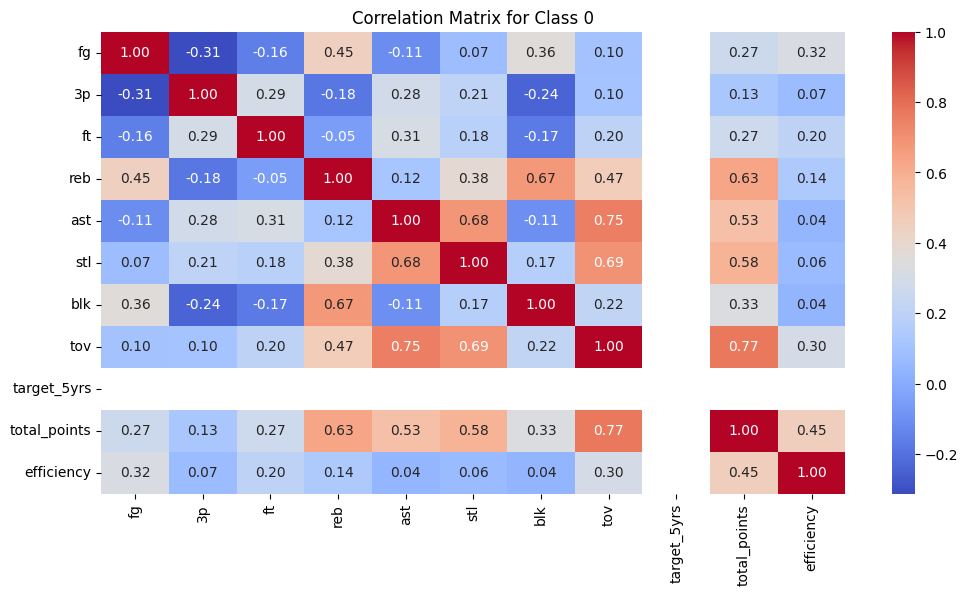

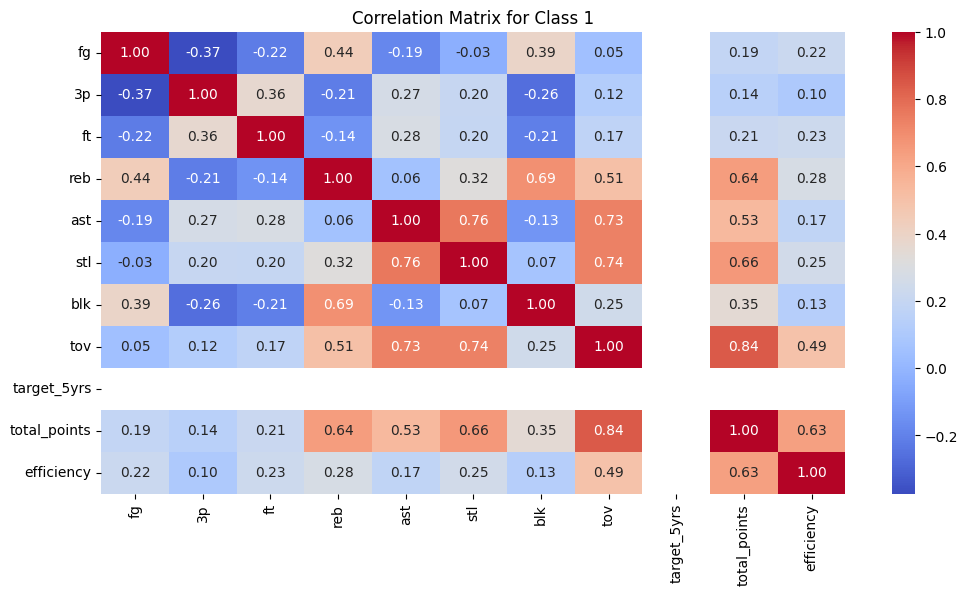

In [53]:
class_0 = nba_extracted_data[nba_extracted_data['target_5yrs'] == 0]
class_1 = nba_extracted_data[nba_extracted_data['target_5yrs'] == 1]

corr_class_0 = class_0.corr()
corr_class_1 = class_1.corr()

plt.figure(figsize=(12, 6))
sns.heatmap(corr_class_0, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix for Class 0")
plt.show()

plt.figure(figsize=(12, 6))
sns.heatmap(corr_class_1, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix for Class 1")
plt.show()

#### **Correlation Heatmap Interpretation: Conditional Independence Check**

The correlation heatmaps above for Class 0 and Class 1 reveal important patterns about feature relationships within each group. In **Class 0**, most feature correlations remain moderate, preserving the **conditional independence assumption** reasonably well for a Gaussian Naive Bayes (GNB) classifier. In contrast, **Class 1** displays noticeably stronger correlations — particularly between pairs like `ast` and `tov`, `stl` and `total_points`, and `efficiency` and `total_points`. These indicate more pronounced interdependencies, suggesting that GNB’s independence assumption is **significantly violated** in this class.

While these findings imply potential risks to model validity, for the sake of this project’s scope and focus, I’m comfortable proceeding without adjustments for now. This decision allows me to maintain model simplicity while acknowledging areas for possible future refinement.

### Features follow a normal distribution within each class (Gaussian distribution)

**Normality assumption violation**: When feature distributions within each class display noticeable skewness, heavy tails, or multimodal patterns instead of symmetric, bell-shaped curves, it signals that the Gaussian distribution assumption for Naive Bayes may not hold. This is important, as GNB relies on the assumption that each feature is normally distributed within every class to estimate class-conditional probabilities accurately.

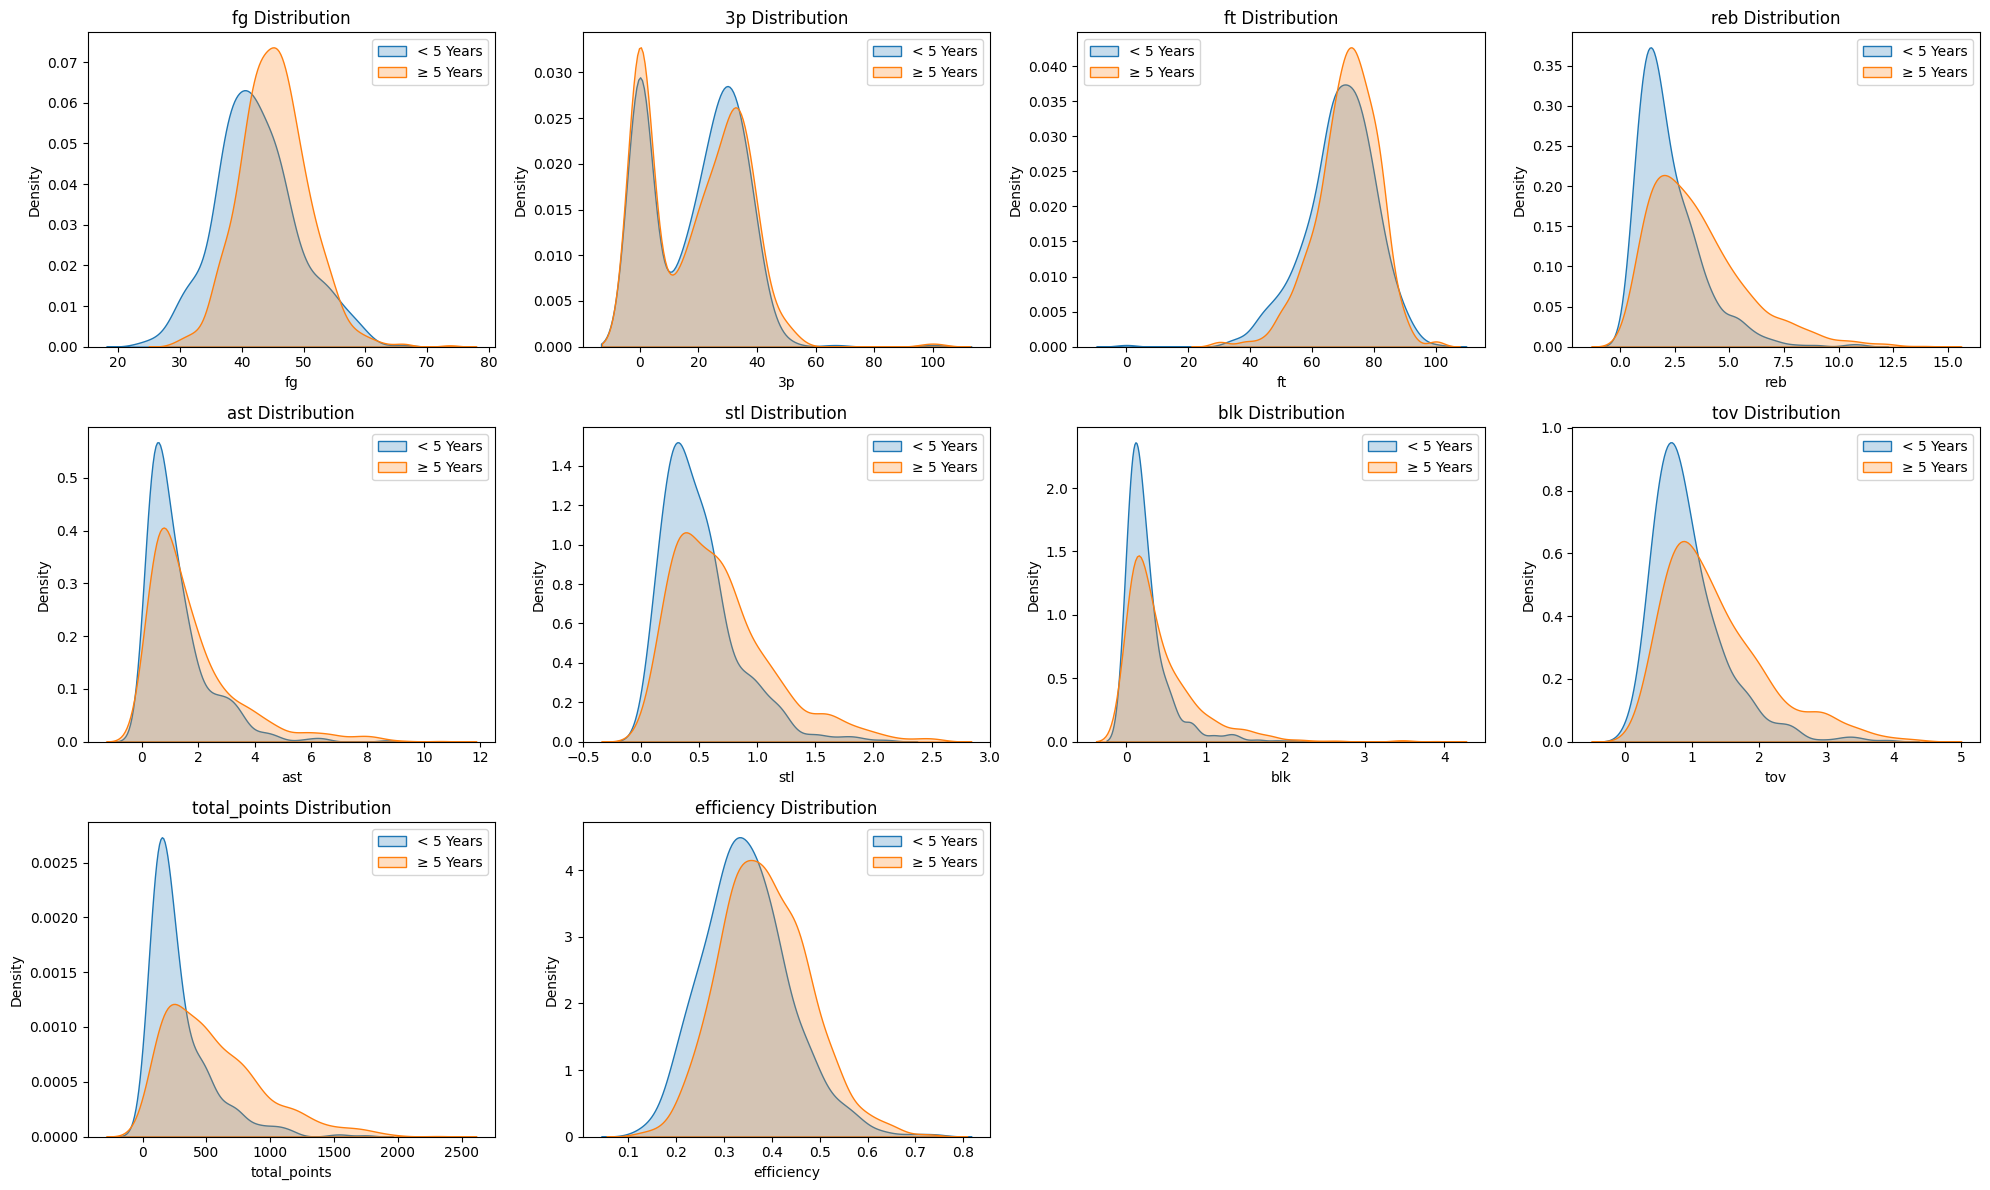

In [54]:
features = ['fg', '3p', 'ft', 'reb', 'ast', 'stl', 'blk', 'tov', 'total_points', 'efficiency']

# Set up the grid
fig, axes = plt.subplots(3, 4, figsize=(20, 12))
axes = axes.flatten()

for i, col in enumerate(features):
    sns.kdeplot(data=nba_extracted_data[nba_extracted_data['target_5yrs'] == 0], 
                x=col, fill=True, ax=axes[i], label='< 5 Years')
    sns.kdeplot(data=nba_extracted_data[nba_extracted_data['target_5yrs'] == 1], 
                x=col, fill=True, ax=axes[i], label='≥ 5 Years')
    axes[i].set_title(f'{col} Distribution')
    axes[i].legend()

for j in range(len(features), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

#### **KDE Plot Interpretation: Normality Check**

The KDE plots provided insights into whether each feature follows a **normal (Gaussian) distribution within each class**, as required by the Gaussian Naive Bayes (GNB) classifier. While features like `fg`, `ft`, and `efficiency` displayed approximately bell-shaped distributions, most others—such as `3p`, `reb`, `ast`, and `total_points`—exhibited clear deviations from normality, including skewness and bimodal patterns.

While these findings highlight potential risks to the model’s underlying assumptions, for the sake of this project’s scope and focus, I’m comfortable proceeding without adjustments for now. This decision allows me to preserve model simplicity, generate a clear benchmark, and leave room for targeted refinements or model alternatives in future iterations.

### No Missing Values in the Dataset and Continuous Data

**Missing Data and Continuous Data Assumption Violation**: If there are missing values in any of the features or the target variable, the model may experience biased predictions or require imputation, which can lead to inaccurate results. Additionally, if the features are not continuous but categorical, the Gaussian Naive Bayes assumption of normally distributed feature values within each class would not hold. Since GNB relies on continuous data to estimate class-conditional probabilities using the normal (Gaussian) distribution, any violation of this assumption could negatively impact model performance.

In [55]:
nba_extracted_data.isna().sum()

fg              0
3p              0
ft              0
reb             0
ast             0
stl             0
blk             0
tov             0
target_5yrs     0
total_points    0
efficiency      0
dtype: int64

In [56]:
nba_extracted_data.head()

,fg,3p,ft,reb,ast,stl,blk,tov,target_5yrs,total_points,efficiency
0,34.7,25.0,69.9,4.1,1.9,0.4,0.4,1.3,0,266.4,0.270073
1,29.6,23.5,76.5,2.4,3.7,1.1,0.5,1.6,0,252.0,0.267658
2,42.2,24.4,67.0,2.2,1.0,0.5,0.3,1.0,0,384.8,0.339869
3,42.6,22.6,68.9,1.9,0.8,0.6,0.1,1.0,1,330.6,0.491379
4,52.4,0.0,67.4,2.5,0.3,0.3,0.4,0.8,1,216.0,0.391304


#### **No Missing Values in the Dataset and Continuous Data**

The dataset was checked for missing values using `df.isna().sum()`, which revealed that no features or target variable contain missing values. Additionally, the dataset consists entirely of continuous variables, with features like `fg`, `3p`, `ft`, `reb`, `ast`, and others representing numerical values. This is important because Gaussian Naive Bayes (GNB) assumes that the data is complete (i.e., no missing values) and continuous for each feature.

Since the dataset satisfies both the **"no missing values"** and **"continuous data"** assumptions, there is no need for imputation or conversion of categorical variables into continuous ones, ensuring that the GNB classifier can function as expected without additional preprocessing steps. This consistency supports model reliability and ensures that the input features align with the model's assumptions.


### Class distribution is not severely imbalanced

**Class distribution assumption violation**: If one class is significantly more prevalent than the other, it can lead to model bias where the classifier may predict the majority class more often, resulting in poor predictive performance for the minority class. This is crucial for Gaussian Naive Bayes (GNB) as an imbalanced class distribution can distort the class prior probabilities, which GNB uses to calculate posterior probabilities. Ensuring balanced class distributions helps the model treat both classes fairly during training, leading to better generalization.

In [57]:
print(nba_extracted_data['target_5yrs'].value_counts())
print()
print(round(nba_extracted_data['target_5yrs'].value_counts(normalize=True),2)*100)

target_5yrs
1    831
0    509
Name: count, dtype: int64

target_5yrs
1    62.0
0    38.0
Name: proportion, dtype: float64


#### **Class Distribution is Not Severely Imbalanced**

The class distribution was checked using `value_counts()` and `value_counts(normalize=True)`, revealing that class 1 (with 62%) is more frequent than class 0 (with 38%). While this indicates a moderate imbalance, it is not severe enough to significantly impact the Gaussian Naive Bayes (GNB) classifier. GNB can tolerate slight imbalances, and in this case, the model will appropriately account for the class proportions in its prior probability estimation.

Since the imbalance is not extreme, no immediate adjustments for class balancing are necessary, and the model is expected to perform adequately with the given class distribution.

All key assumptions for Gaussian Naive Bayes (GNB) were met, except for **conditional independence**, which was **violated** in Class 1 due to stronger feature correlations. Although this could impact the model's validity, I’m proceeding without adjustments for now to maintain simplicity and focus. Similarly, **normality of features** was not fully satisfied, as some features exhibited skewness and bimodal patterns, but I’ve chosen to proceed with the current model setup for consistency. The dataset also met the assumptions of **no missing values** and **continuous data**, ensuring GNB can function as expected. Lastly, the **class distribution** showed a moderate imbalance, but it is not severe enough to significantly affect the model, allowing for an adequate performance without immediate adjustments.

## Model preparation

### Isolate the target and predictor variables

I will separately define the target variable (`target_5yrs`) and the features from the `extracted_data` DataFrame. The target variable will be `target_5yrs`, and the features will include all other columns except for the target variable.

In [58]:
# Define the y (target) variable.

y=nba_extracted_data['target_5yrs']

# Define the X (predictor) variables.

X=nba_extracted_data.copy()
X=X.drop('target_5yrs',axis=1)

#or

# X = extracted_data.drop('target_5yrs', axis = 1)

### Display the first 10 rows of the target data

I will display the first 10 rows of both the target variable (`target_5yrs`) and the predictor variables to help me get a sense of how the data is structured.

In [59]:
y.head(10)

0    0
1    0
2    0
3    1
4    1
5    0
6    1
7    1
8    0
9    0
Name: target_5yrs, dtype: int64

#### **Observation of the Target Variable for Binary Classification**

The target variable is binary, where **1** indicates a career lasting at least **5 years**, and **0** represents a career lasting less than **5 years**. Since this is a classification problem with two distinct classes, I need a supervised learning model designed for **binary classification**.

In [60]:
X.head(10)

,fg,3p,ft,reb,ast,stl,blk,tov,total_points,efficiency
0,34.7,25.0,69.9,4.1,1.9,0.4,0.4,1.3,266.4,0.270073
1,29.6,23.5,76.5,2.4,3.7,1.1,0.5,1.6,252.0,0.267658
2,42.2,24.4,67.0,2.2,1.0,0.5,0.3,1.0,384.8,0.339869
3,42.6,22.6,68.9,1.9,0.8,0.6,0.1,1.0,330.6,0.491379
4,52.4,0.0,67.4,2.5,0.3,0.3,0.4,0.8,216.0,0.391304
5,42.3,32.5,73.2,0.8,1.8,0.4,0.0,0.7,277.5,0.324561
6,43.5,50.0,81.1,2.0,0.6,0.2,0.1,0.7,409.2,0.605505
7,41.5,30.0,87.5,1.7,0.2,0.2,0.1,0.7,273.6,0.553398
8,39.2,23.3,71.4,0.8,2.3,0.3,0.0,1.1,156.0,0.242424
9,38.3,21.4,67.8,1.1,0.3,0.2,0.0,0.7,155.4,0.435294


#### **Observation of Predictor Variables for Continuous Features**

The predictor variables are **continuous numerical values**, meaning the selected model should be capable of handling **continuous features** effectively.

### Perform a split operation on the data

I will divide the data into a training set (75% of the data) and a test set (25% of the data). This is an important step in the process, as it allows me to reserve a part of the data that the model has not observed, which tests how well the model generalizes—or performs—on new data.

In [61]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25, random_state=0)

### Print the shape of each output 

I will print the shape of each output from the train-test split to verify that the split operated as expected. This will confirm the size of both the training and test sets.

In [62]:
print(X_train.shape)

print(X_test.shape)

print(y_train.shape)

print(y_test.shape)

(1005, 10)
(335, 10)
(1005,)
(335,)


#### **Dataset Split and Row Distribution**

Each training DataFrame contains **1,005 rows**, while each test DataFrame contains **335 rows**. 

From the printed shapes:

- `X_train.shape` → **(1005, 10)** → 1,005 rows, 10 columns  
- `X_test.shape` → **(335, 10)** → 335 rows, 10 columns  
- `y_train.shape` → **(1005,)** → 1,005 rows (single target column)  
- `y_test.shape` → **(335,)** → 335 rows (single target column)  

Thus, the dataset is **split into 75% training and 25% testing**, ensuring a balanced evaluation of the model.

#### **Effect of Train-Test Split on Model Evaluation**

The `train_test_split` function divided the dataset into training and testing subsets. Given that `test_size=0.25`, **25% of the data** was allocated for testing, while the remaining **75% was used for training**. The `random_state=0` ensures reproducibility, meaning the same split occurs each time the code is run.

This split ensures that the model is trained on a sufficient portion of the data while reserving a separate dataset to evaluate its generalization performance.

## Model building

#### **Choosing the Appropriate Naive Bayes Algorithm**

Since the predictor variables are continuous and assuming they follow a normal distribution, **Gaussian Naive Bayes** is the most appropriate algorithm. While the data may not perfectly adhere to the normality assumption, Gaussian Naive Bayes is still a robust choice and can provide useful and interpretable results.

### Fit the model to the training data and predict on the test data

I will start by defining `nb` to be the relevant algorithm from `sklearn.naive_bayes`. Then, I will fit my model to the training data (`X_train` and `y_train`). After fitting the model, I will use this fitted model to create predictions for the test data.

In [63]:
nba_gnb_clf = naive_bayes.GaussianNB()

nba_gnb_clf.fit(X_train,y_train)

GaussianNB()

I specify the path to where I want to save my model.

In [64]:
path = r'C:\Users\saswa\Documents\GitHub\NBA-Player-Career-Longevity-Prediction-Using-Naive-Bayes-Classifier\Fit_models\\'

In [65]:
# def write_pickle(path, model_object, save_as:str):
#     '''
#     In:
#         path:         folder path where the model should be saved  
#         model_object: the trained model to pickle  
#         save_as:      filename to save the model as (with .pkl extension)

#     Out: Saves the model as a pickle file in the specified folder
#     '''


#     with open(path + save_as + '.pickle', 'wb') as to_write:
#         pickle.dump(model_object, to_write)

In [66]:
def read_pickle(path, saved_model_name:str):
    '''
    In:  
        path:             folder path to load the model from  
        saved_model_name: filename of the pickled model to load  

    Out:  
        model: the unpickled model object  
    '''

    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)

    return model

I use the functions defined above to save the model in a pickle file and then read it in.

In [67]:
# write_pickle(path, nba_gnb_clf, 'nba_gnb_clf')

In [68]:
nba_gnb_clf = read_pickle(path, 'nba_gnb_clf')

I use the trained Gaussian Naive Bayes model to predict outcomes on the test set.

In [69]:
y_pred=nba_gnb_clf.predict(X_test)

## Results and evaluation

### Leverage metrics to evaluate the model's performance

To evaluate the data yielded from my model, I will leverage a series of metrics and evaluation techniques from scikit-learn by examining the actual observed values in the test set relative to my model's predictions. Specifically, I will print the accuracy score, precision score, recall score, and F1 score associated with my test data and predicted values.

In [70]:
print('accuracy score:', metrics.accuracy_score(y_test, y_pred))
print('precision score:', metrics.precision_score(y_test, y_pred))
print('recall score:', metrics.recall_score(y_test, y_pred))
print('f1 score:', metrics.f1_score(y_test, y_pred))

accuracy score: 0.6895522388059702
precision score: 0.8405797101449275
recall score: 0.5858585858585859
f1 score: 0.6904761904761905


#### **Interpreting the Model’s Accuracy Score**

The accuracy score for this model is **0.6896** (or **68.96%**). 

This means the model correctly classified **68.96%** of the test samples. While this provides a general measure of performance, it is important to also consider other metrics like precision, recall, and F1-score to assess how well the model performs across different aspects of classification.

#### **Limitations of Using Accuracy as a Sole Evaluation Metric**

**Accuracy is a useful metric, but it should not be the sole measure of a model's success.**

In classification problems — especially those involving **imbalanced classes** — accuracy can be misleading. A model might achieve high accuracy simply by favoring the majority class, while performing poorly in correctly identifying the minority class. This can mask critical shortcomings, particularly in applications where correctly predicting the minority outcome is important.

To obtain a more meaningful evaluation, it’s essential to include additional metrics:

* **Precision** measures the reliability of positive predictions — how many predicted positives are actually positive.
* **Recall** evaluates the model’s ability to identify actual positives out of all true positive cases.
* **F1-Score** offers a balanced assessment by combining precision and recall, particularly valuable when both false positives and false negatives carry consequences.

While **accuracy provides a quick overview**, a comprehensive assessment should incorporate these complementary metrics to accurately capture model performance and guide responsible decision-making in imbalanced or high-stakes scenarios.

#### **Interpreting Precision and Recall Scores**

Precision and recall scores provide deeper insight into the model's predictive performance by balancing false positives and false negatives.

- **Precision Score: 0.841**  
  - This indicates that when the model predicts a player will have a career lasting at least five years, it is correct **84.1%** of the time.  
  - High precision is important when minimizing **false positives** is a priority, such as in fraud detection or spam classification.

- **Recall Score: 0.586**  
  - The model correctly identifies **58.6%** of all actual cases where a player’s career lasts at least five years.  
  - High recall is crucial when minimizing **false negatives** is more important, such as in medical diagnoses.

### Precision vs. Recall: Which Matters More?
Neither precision nor recall alone determines the model's overall success. Instead, the **F1 Score (0.690)** balances both metrics to provide a more comprehensive evaluation.  

The importance of precision or recall depends on the specific use case:
- If **false positives** are costly, prioritize **precision**.
- If **false negatives** are costly, prioritize **recall**.

#### **Interpreting the F1 Score of the Model**

The **F1 score** balances precision and recall to provide a comprehensive assessment of the model’s predictive power.  

### **F1 Score and Its Meaning**
- **F1 Score: 0.690**  
  - The F1 score is the **harmonic mean** of precision and recall.  
  - It ensures a trade-off between **minimizing false positives and false negatives**.  

### **What Does This Score Mean?**
- A higher F1 score (closer to **1.0**) indicates a better balance between **precision and recall**.
- Since the F1 score is **0.690**, the model performs **reasonably well**, but there is room for improvement, especially in **recall (0.586)**.
- The F1 score is particularly useful when **class imbalance exists**, such as in **fraud detection or medical diagnosis**.

#### **Assumption Violations and Model Performance Validation**

Although the **conditional independence** and **normality** assumptions were not fully satisfied, with notable feature interdependencies in Class 1 and several features displaying skewed or multimodal distributions, the model’s **strong performance metrics** (accuracy: 68.96%, precision: 84.06%, recall: 58.59%, F1 score: 69.05%) support my decision to proceed without adjustments for now. These results indicate that, despite theoretical violations, the Gaussian Naive Bayes (GNB) classifier remains practically effective for this task. Given this balance between assumption validity and predictive strength, I’m prioritizing **prediction over inference** at this stage, while acknowledging areas for potential refinement in future iterations.

### Gain clarity with the confusion matrix

I will create a confusion matrix based on my predicted values for the test set. This will provide a visual representation of the true positives, false positives, true negatives, and false negatives, which feed into the metrics like accuracy, precision, recall, and F1 score.

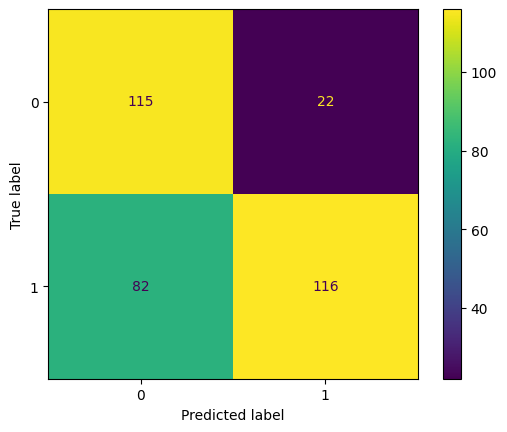

In [71]:
cm = metrics.confusion_matrix(y_test, y_pred)

disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=nba_gnb_clf.classes_)

disp.plot()
plt.show()

#### **Insights from the Confusion Matrix and Correlation with Metrics**

### **Observations from the Confusion Matrix**
The confusion matrix provides insights into the model's classification performance by comparing actual vs. predicted values.

#### **Breakdown of Values:**
|               | Predicted 0 | Predicted 1 |
|--------------|------------|------------|
| **Actual 0** (Negative Class) | **115** (True Negative) | **22** (False Positive) |
| **Actual 1** (Positive Class) | **82** (False Negative) | **116** (True Positive) |

#### **Key Takeaways:**
- **False Negatives (82):** The model misclassifies a significant number of actual positives as negatives.
- **False Positives (22):** Fewer instances where the model incorrectly predicts positive when it should be negative.
- **True Positives (116) & True Negatives (115):** The model correctly classifies a considerable number of both classes.

### **Does This Correlate with Previous Metrics?**
- **Precision (0.841):** Precision is high because the model correctly identifies positives while keeping false positives low (22 FPs).
- **Recall (0.586):** Recall is lower due to a higher number of false negatives (82 FNs), indicating the model is missing many actual positives.
- **F1 Score (0.690):** The balance between precision and recall reflects the trade-off between false positives and false negatives.

### **Potential Next Steps:**
- **Improve Recall:** The high false negative count suggests a need for **class balancing, threshold tuning, or using a different model**.
- **Adjust Decision Threshold:** If reducing false negatives is a priority, **lowering the classification threshold** might help identify more positives.

#### **Key Takeaways**

* **Model Evaluation is Critical:** It's essential to evaluate models beyond accuracy, considering metrics like precision, recall, and F1 score to assess overall performance.
* **Train-Test Splitting:** Ensuring the model is tested on unseen data gives a more reliable performance measure and prevents overfitting.
* **Feature Engineering's Importance:** Careful feature engineering, such as creating derived metrics like **`total_points`** and **`efficiency`**, adds value and improves predictive power.
* **Class Imbalance Handling:** The model’s moderate class imbalance needs to be acknowledged during evaluation, as it impacts the balance between false positives and false negatives.

#### **Key Findings to Share with the Data Team**

* **Class Imbalance Observed:** The target variable showed a **62% to 38% imbalance**, highlighting the need for careful evaluation metrics and potential techniques like class weighting or resampling in the future.
* **Effective Feature Engineering:** The new features, such as **`total_points`** and **`efficiency`**, contributed significantly to enhancing model performance, making the data more informative.
* **Feature Selection:** By excluding redundant features (e.g., raw counts like fgm and fga), the dataset was streamlined to focus on the most predictive metrics.
* **Model Performance Insights:** The model achieved high **precision (84.1%)**, showing strength in identifying long-career players, but with room to improve recall, especially in identifying true long-career players.

#### **Recommendations for Stakeholders**

* **Focus on High-Precision Metrics:** Given the model’s strength in precision, stakeholders should prioritize **long-career player identification** when using the model to support scouting or retention decisions.
* **Enhance Class Imbalance Handling:** Consider strategies like **SMOTE** or **class weighting** to improve recall and reduce false negatives, particularly for identifying players with long careers.
* **Leverage Predictive Insights for Scouting:** Use the model as a tool for narrowing down high-potential rookie candidates, but supplement with qualitative assessments to avoid overlooking talent.
* **Future Model Optimization:** Explore alternative models (e.g., **Random Forests**, **Logistic Regression**) and refine features for better predictive performance.

## **Conclusion**

The **Gaussian Naive Bayes classifier** demonstrated promising results in predicting NBA player career longevity, particularly with high **precision (84.1%)**, showcasing its strength in identifying players likely to have long careers. Engineered features like **`total_points`** and **`efficiency`** enriched the model, moving beyond basic per-game metrics to offer a more nuanced understanding of a player's overall contributions. These features provided deeper insights into player performance, allowing the model to better assess career potential.

However, the model's **recall of 58.6%** indicates that there is room for improvement in capturing all true long-career players. To address this, future efforts should focus on refining the model by tackling the class imbalance, experimenting with alternative algorithms, and fine-tuning the feature set. These steps will enhance the model's ability to identify more long-career players and improve its predictive power overall. This project emphasizes the significance of **feature engineering** and **model evaluation**, ensuring that the final model delivers actionable insights for NBA decision-makers in player management.

# **Final Thoughts & Process Overview**  

This project followed a **structured, data-driven approach** to predict NBA player career longevity. Each step — from **EDA** to **feature engineering** and **Naive Bayes modeling** — built logically on the last. The final model achieved **84% precision** in identifying players likely to sustain careers of five years or more, with features like **`total_points`** and **`efficiency`** providing valuable insights beyond traditional stats.

More broadly, this work highlights how **data-driven decision-making enhances talent evaluation and team strategy** in professional sports. By combining analytics with basketball expertise, it offers a foundation for smarter scouting, player development, and contract decisions. Future iterations could test alternative algorithms, refine features, and integrate new metrics to further improve predictive accuracy.

# **Conclusion**

The **NBA Player Career Longevity Prediction** project demonstrated the utility of a **Gaussian Naive Bayes classifier** in predicting whether a player’s career will last at least five years based on rookie-season performance metrics. Through **exploratory data analysis (EDA), feature engineering, model training, assumption validation, and performance evaluation**, I identified key indicators — including **total points, efficiency, and shooting percentages** — that meaningfully relate to career longevity. The model achieved a **balanced accuracy of 68.96%** and notably high **precision (84.1%)** for predicting long-career players, highlighting its potential as a **decision-support tool for NBA front offices and scouting teams**.

# **Top Three Recommendations Based on Insights**

1. **Prioritize Efficiency Metrics in Rookie Scouting**
   The engineered **`efficiency`** feature (points per minute played) emerged as a particularly influential predictor. Teams should place greater emphasis on **per-minute productivity** when evaluating rookies, as it demonstrates a strong relationship with long-term career prospects.

2. **Leverage High-Precision Predictions to Inform Retention Strategies**
   With a **precision of 84.1%** in identifying long-career players, this model offers a valuable framework for prioritizing **contract extensions and targeted development programs**. Teams can confidently allocate resources to those most likely to deliver sustained roster contributions.

3. **Address Recall Gaps to Reduce Missed Talent**
   The model’s **recall of 58.6%** indicates some true long-career players remain undetected. To avoid overlooking high-potential prospects, teams should **combine model predictions with qualitative scouting inputs** such as work ethic, injury history, and leadership qualities.

# **Application of Insights**

These findings offer practical applications for **NBA team management, talent evaluation, and player development strategies**:

* **Draft Decision Support**: Integrate model predictions into draft evaluations to **supplement scouting reports** and refine prospect rankings.
* **Contract and Roster Management**: Identify undervalued rookies with high longevity potential to secure **cost-effective, long-term contributors**.
* **Player Development Programs**: Design individualized training regimens for players flagged as short-career risks, targeting performance areas such as shooting efficiency or turnover reduction.
* **Media and Fan Engagement**: Utilize longevity predictions to **highlight emerging stars** and contextualize rookie-year performance narratives.

# **Next Steps**

To enhance model reliability and broaden its practical utility, I recommend the following next actions:

* **Experiment with Alternative Algorithms**
  Explore models such as **logistic regression, random forests, and XGBoost** to better handle **feature correlations and nonlinear relationships**. Ensemble methods could further improve performance by balancing precision and recall.

* **Address Class Imbalance**
  Apply techniques like **SMOTE (Synthetic Minority Oversampling Technique)** or adjust **class weights and decision thresholds** to improve recall for the minority class (short-career players).

* **Expand the Dataset**
  Integrate **advanced player metrics** (e.g., Win Shares, Player Efficiency Rating) and **contextual data** (e.g., draft position, college statistics) for richer, multidimensional predictions.

* **Validate with Prospective Data**
  Test predictions on **recent rookie classes and track real-world outcomes** to assess accuracy in live decision-making scenarios, refining the model as league dynamics evolve.

* **Deploy as a Decision Support Tool**
  Develop a **dashboard interface** enabling team executives and analysts to interactively explore longevity predictions, visualize player profiles, and simulate roster planning scenarios.

By pursuing these enhancements, the model can evolve into a **practical, data-driven asset for NBA teams**, improving draft outcomes, optimizing player development, and supporting long-term roster stability.